# - LDA and Sentiment Analysis on The Holy Quran

### -The application of LDA on THQ will be done on the 30 divisions (Juz')

##### for this reason, I will make use of the disaggregation of the verses to combine them in a separate division. This will yield my 30 divisions

data downloaded from: https://www.kaggle.com/datasets/zohaib1111/quran-dataset

In [ ]:
###############
### READ ME ###
##############

# IN THE BELOW CELLS, AN ITERATION ON LDA MODELS AND PARAMETERS TAKES PLACE
# JUST IN CASE, I HAVE SAVED THE BEST MODEL THAT WAS RETURNED
# IF THE NEED ARISES, RUN THIS CELL (file is attached)

# loading best_model that i saved
best_model = LdaModel.load('best_LDA_model')

## Importing Libraries

In [1]:
# Collections
from collections import OrderedDict
from collections import defaultdict

# Gensim
import gensim
from gensim import corpora
from gensim import models
from gensim.models import LdaMulticore, LdaModel
from gensim.models import CoherenceModel

# Matplotlib
import matplotlib.pyplot as plt

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Numpy
import numpy as np

# Pandas
import pandas as pd

# pyLDAvis
import pyLDAvis.gensim

# re (Regular Expressions)
import re

# Wordcloud
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df

,SrNo,JuzNo,SurahNo,AyahNo,EnglishTranslation,OrignalArabicText,ArabicText,ArabicWordCount,ArabicLetterCount
0,1,1,1,1,"In the name of Allah, Most Gracious, Most Merc...",?????? ??????? ???????????? ??????????,??? ???? ?????? ??????,4,19
1,2,1,1,2,"Praise be to Allah, the Cherisher and Sustaine...",????????? ??????? ????? ?????????????,????? ??? ?? ????????,4,18
2,3,1,1,3,"Most Gracious, Most Merciful;",???????????? ??????????,?????? ??????,2,12
3,4,1,1,4,Master of the Day of Judgment.,??????? ?????? ????????,???? ??? ?????,3,12
4,5,1,1,5,"Thee do we worship, and Thine aid we seek.",???????? ???????? ?????????? ???????????,???? ???? ????? ??????,4,19
...,...,...,...,...,...,...,...,...,...
6232,6233,30,114,3,"The god (or judge) of Mankind,-",??????? ????????,??? ?????,2,8
6233,6234,30,114,4,"From the mischief of the Whisperer (of Evil), ...",???? ????? ???????????? ???????????,?? ?? ??????? ??????,4,17
6234,6235,30,114,5,(The same) who whispers into the hearts of Man...,??????? ?????????? ??? ??????? ????????,???? ????? ?? ???? ?????,5,20
6235,6236,30,114,6,Among Jinns and among men.,???? ?????????? ??????????,?? ????? ??????,3,13


In [4]:
# removing last row
df = df.drop(df.index[-1]) # run once

In [5]:
df

,SrNo,JuzNo,SurahNo,AyahNo,EnglishTranslation,OrignalArabicText,ArabicText,ArabicWordCount,ArabicLetterCount
0,1,1,1,1,"In the name of Allah, Most Gracious, Most Merc...",?????? ??????? ???????????? ??????????,??? ???? ?????? ??????,4,19
1,2,1,1,2,"Praise be to Allah, the Cherisher and Sustaine...",????????? ??????? ????? ?????????????,????? ??? ?? ????????,4,18
2,3,1,1,3,"Most Gracious, Most Merciful;",???????????? ??????????,?????? ??????,2,12
3,4,1,1,4,Master of the Day of Judgment.,??????? ?????? ????????,???? ??? ?????,3,12
4,5,1,1,5,"Thee do we worship, and Thine aid we seek.",???????? ???????? ?????????? ???????????,???? ???? ????? ??????,4,19
...,...,...,...,...,...,...,...,...,...
6231,6232,30,114,2,"The King (or Ruler) of Mankind,",?????? ????????,??? ?????,2,8
6232,6233,30,114,3,"The god (or judge) of Mankind,-",??????? ????????,??? ?????,2,8
6233,6234,30,114,4,"From the mischief of the Whisperer (of Evil), ...",???? ????? ???????????? ???????????,?? ?? ??????? ??????,4,17
6234,6235,30,114,5,(The same) who whispers into the hearts of Man...,??????? ?????????? ??? ??????? ????????,???? ????? ?? ???? ?????,5,20


In [6]:
# keeping cols i want
cols = ['SrNo', 'JuzNo', 'SurahNo', 'AyahNo', 'EnglishTranslation']
df = df[cols]

In [7]:
df

,SrNo,JuzNo,SurahNo,AyahNo,EnglishTranslation
0,1,1,1,1,"In the name of Allah, Most Gracious, Most Merc..."
1,2,1,1,2,"Praise be to Allah, the Cherisher and Sustaine..."
2,3,1,1,3,"Most Gracious, Most Merciful;"
3,4,1,1,4,Master of the Day of Judgment.
4,5,1,1,5,"Thee do we worship, and Thine aid we seek."
...,...,...,...,...,...
6231,6232,30,114,2,"The King (or Ruler) of Mankind,"
6232,6233,30,114,3,"The god (or judge) of Mankind,-"
6233,6234,30,114,4,"From the mischief of the Whisperer (of Evil), ..."
6234,6235,30,114,5,(The same) who whispers into the hearts of Man...


In [8]:
df['EnglishTranslation'][0]

'In the name of Allah, Most Gracious, Most Merciful.'

In [9]:
## calculating the number of words in text col

# creating a series with all words in text col
all_words = df['EnglishTranslation'].str.split().explode()
total_word_count = len(all_words)

## getting unique words in col
unique_words = all_words.unique()

print(f"Total number of words in the column: {total_word_count}")
print(f"Unique words in the column: {len(unique_words)}")


Total number of words in the column: 167505
Unique words in the column: 17238


In [10]:
unique_words

array(['In', 'the', 'name', ..., 'Whisperer', 'whisper),-', 'same)'],
      dtype=object)

In [11]:
## printing most frequent words before cleaning

from collections import Counter

text = ' '.join(df['EnglishTranslation'])

words = text.split()

word_counter = Counter(words)

# choosing num of most common words
top_words = word_counter.most_common(50)

for word, frequency in top_words:
    print(f'{word}: {frequency}')


the: 7423
and: 5420
of: 4627
to: 4089
is: 2800
in: 2670
they: 2450
a: 2341
that: 2126
for: 1897
ye: 1894
will: 1805
Allah: 1730
who: 1632
their: 1479
not: 1339
them: 1331
He: 1321
be: 1318
We: 1270
those: 1213
with: 1148
have: 1130
are: 1121
And: 1117
from: 1086
it: 1076
but: 1025
on: 937
you: 913
your: 760
all: 714
as: 702
he: 627
shall: 622
if: 589
thou: 588
no: 585
which: 578
But: 575
do: 564
his: 559
what: 541
I: 536
or: 504
when: 484
we: 473
by: 469
His: 466
said:: 461


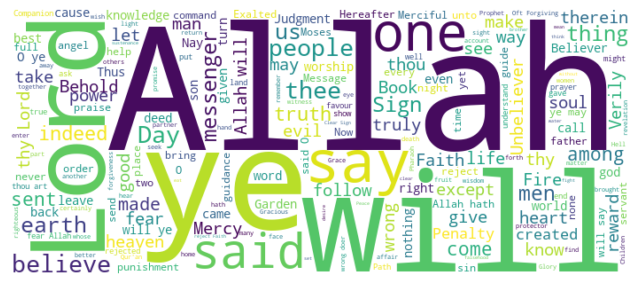

In [12]:
# extracting text col
english_translations = df['EnglishTranslation'].str.cat(sep=' ')

# defining wordcloud
wordcloud = WordCloud(width=700, height=300, background_color='white')
wordcloud.generate(english_translations)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [9]:
## because i am performing LDA on the 30 divisions, i am grouping rows of the same division into one row

data = df.groupby('JuzNo')['EnglishTranslation'].agg(' '.join).reset_index()
print(data)


    JuzNo                                 EnglishTranslation
0       1  In the name of Allah, Most Gracious, Most Merc...
1       2  The fools among the people will say: "What hat...
2       3  Those messengers We endowed with gifts, some a...
3       4  All food was lawful to the Children of Israel,...
4       5  Also (prohibited are) women already married, e...
5       6  Allah loveth not that evil should be noised ab...
6       7  Strongest among men in enmity to the believers...
7       8  Even if We did send unto them angels, and the ...
8       9  The leaders, the arrogant party among his peop...
9      10  And know that out of all the booty that ye may...
10     11  The ground (of complaint) is against such as c...
11     12  There is no moving creature on earth but its s...
12     13  "Nor do I absolve my own self (of blame): the ...
13     14  A. L. R. These are the Ayats of Revelation,- o...
14     15  Glory to (Allah) Who did take His servant for ...
15     16  He answered: 

In [10]:
## importing nltk's stopwords to see what the list contains where i will also add more stopwords


nltk_stops = set(stopwords.words('english'))

# list of stopwords that i also want to remove 
add_stopwords = ('one', 'thy', 'thou', 'thee', 'shall', 'unto', 'hath', 'let', 'ye', 'shalt', 'hast', 'thee', 'upon',
                 'said', 'thine', 'come', 'speak', 'without', 'us', 'also', 'ay', 'name', 'tis', 'st',
                 'saith', 'thus', 'thereof', 'put', 'may', 'verily', 'say', 'doth', 'nay', 'o')

# my final stopwords list that will be used
all_stopwords = nltk_stops.union(add_stopwords)


In [11]:
all_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'ay',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'come',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'doth',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'hast',
 'hath',
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'let',
 'll',
 'm',
 'ma',
 'may',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'name',
 'nay',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',


# Preprocessing

In [12]:
text = data['EnglishTranslation']

In [13]:
## preprocessing code to clean text




def clean_text(text, remove_stopwords=False, lemmatize=False, tokenize=False):
    
    # lowercasing text
    text = text.lower()

    # removing special characters + punctuation 
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # removing double spacing
    text = re.sub(r'\s+', ' ', text)

    # removing stopwords
    if remove_stopwords:
        words = text if isinstance(text, list) else text.split()
        words = [word for word in words if word not in all_stopwords]
        text = ' '.join(words)
    
    # lemmatization
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        if isinstance(text, list):
            text = [lemmatizer.lemmatize(word) for word in text]
        else:
            text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
        
    # tokenization
    if tokenize:
        text = nltk.word_tokenize(text)

    return text


In [14]:
# cleaning the text without removing stopwords, lemmatizing, or tokenizing
cleaned_text_inclstops = text.apply(clean_text, remove_stopwords=False)

print(cleaned_text_inclstops)

0     in the name of allah most gracious most mercif...
1     the fools among the people will say what hath ...
2     those messengers we endowed with gifts some ab...
3     all food was lawful to the children of israel ...
4     also prohibited are women already married exce...
5     allah loveth not that evil should be noised ab...
6     strongest among men in enmity to the believers...
7     even if we did send unto them angels and the d...
8     the leaders the arrogant party among his peopl...
9     and know that out of all the booty that ye may...
10    the ground of complaint is against such as cla...
11    there is no moving creature on earth but its s...
12    nor do i absolve my own self of blame the huma...
13    a l r these are the ayats of revelation of a q...
14    glory to allah who did take his servant for a ...
15    he answered did i not tell thee that thou cans...
16    closer and closer to mankind comes their recko...
17    the believers must eventually win through 

In [15]:
text[0]

'In the name of Allah, Most Gracious, Most Merciful. Praise be to Allah, the Cherisher and Sustainer of the worlds; Most Gracious, Most Merciful; Master of the Day of Judgment. Thee do we worship, and Thine aid we seek. Show us the straight way, The way of those on whom Thou hast bestowed Thy Grace, those whose (portion) is not wrath, and who go not astray. A. L. M. This is the Book; in it is guidance sure, without doubt, to those who fear Allah; Who believe in the Unseen, are steadfast in prayer, and spend out of what We have provided for them; And who believe in the Revelation sent to thee, and sent before thy time, and (in their hearts) have the assurance of the Hereafter. They are on (true) guidance, from their Lord, and it is these who will prosper. As to those who reject Faith, it is the same to them whether thou warn them or do not warn them; they will not believe. Allah hath set a seal on their hearts and on their hearing, and on their eyes is a veil; great is the penalty they 

In [16]:
cleaned_text_inclstops[0]

'in the name of allah most gracious most merciful praise be to allah the cherisher and sustainer of the worlds most gracious most merciful master of the day of judgment thee do we worship and thine aid we seek show us the straight way the way of those on whom thou hast bestowed thy grace those whose portion is not wrath and who go not astray a l m this is the book in it is guidance sure without doubt to those who fear allah who believe in the unseen are steadfast in prayer and spend out of what we have provided for them and who believe in the revelation sent to thee and sent before thy time and in their hearts have the assurance of the hereafter they are on true guidance from their lord and it is these who will prosper as to those who reject faith it is the same to them whether thou warn them or do not warn them they will not believe allah hath set a seal on their hearts and on their hearing and on their eyes is a veil great is the penalty they incur of the people there are some who sa

In [17]:
cleaned_text_inclstops[25]

'hamim the revelation of the book is from allah the exalted in power full of wisdom we created not the heavens and the earth and all between them but for just ends and for a term appointed but those who reject faith turn away from that whereof they are warned say do ye see what it is ye invoke besides allah show me what it is they have created on earth or have they a share in the heavens bring me a book revealed before this or any remnant of knowledge ye may have if ye are telling the truth and who is more astray than one who invokes besides allah such as will not answer him to the day of judgment and who in fact are unconscious of their call to them and when mankind are gathered together at the resurrection they will be hostile to them and reject their worship altogether when our clear signs are rehearsed to them the unbelievers say of the truth when it comes to them this is evident sorcery or do they say he has forged it say had i forged it then can ye obtain no single blessing for m

In [18]:
## removing stopwords, lemmatizing, and tokenizing   

cleaned_text = text.apply(clean_text, remove_stopwords=True, tokenize=True, lemmatize=True)

print(cleaned_text)

0     [allah, gracious, merciful, praise, allah, che...
1     [fool, among, people, turned, qibla, used, all...
2     [messenger, endowed, gift, others, allah, spok...
3     [food, lawful, child, israel, except, israel, ...
4     [prohibited, woman, already, married, except, ...
5     [allah, loveth, evil, noised, abroad, public, ...
6     [strongest, among, men, enmity, believer, wilt...
7     [even, send, angel, dead, gathered, together, ...
8     [leader, arrogant, party, among, people, shuai...
9     [know, booty, acquire, war, fifth, share, assi...
10    [ground, complaint, claim, exemption, rich, pr...
11    [moving, creature, earth, sustenance, dependet...
12    [absolve, self, blame, human, soul, certainly,...
13    [l, r, ayats, revelation, quran, make, thing, ...
14    [glory, allah, take, servant, journey, night, ...
15    [answered, tell, canst, patience, moses, ever,...
16    [closer, closer, mankind, come, reckoning, yet...
17    [believer, must, eventually, win, humble, 

In [19]:
cleaned_text[0]

['allah',
 'gracious',
 'merciful',
 'praise',
 'allah',
 'cherisher',
 'sustainer',
 'world',
 'gracious',
 'merciful',
 'master',
 'day',
 'judgment',
 'worship',
 'aid',
 'seek',
 'show',
 'straight',
 'way',
 'way',
 'bestowed',
 'grace',
 'whose',
 'portion',
 'wrath',
 'go',
 'astray',
 'l',
 'book',
 'guidance',
 'sure',
 'doubt',
 'fear',
 'allah',
 'believe',
 'unseen',
 'steadfast',
 'prayer',
 'spend',
 'provided',
 'believe',
 'revelation',
 'sent',
 'sent',
 'time',
 'heart',
 'assurance',
 'hereafter',
 'true',
 'guidance',
 'lord',
 'prosper',
 'reject',
 'faith',
 'whether',
 'warn',
 'warn',
 'believe',
 'allah',
 'set',
 'seal',
 'heart',
 'hearing',
 'eye',
 'veil',
 'great',
 'penalty',
 'incur',
 'people',
 'believe',
 'allah',
 'last',
 'day',
 'really',
 'believe',
 'fain',
 'would',
 'deceive',
 'allah',
 'believe',
 'deceive',
 'realise',
 'heart',
 'disease',
 'allah',
 'increased',
 'disease',
 'grievous',
 'penalty',
 'incur',
 'false',
 'make',
 'mischief',

In [20]:
data['cleaned_text'] = cleaned_text

## Creating a DTM 

In [21]:
# creating a Gensim dictionary using preprocessed tokenized text in  data['cleaned_text']

dictionary = corpora.Dictionary(data['cleaned_text'])


In [22]:
print(dictionary)

Dictionary<5668 unique tokens: ['abide', 'abounding', 'abraham', 'abrogate', 'absence']...>


In [23]:
# converting tokenized text to a bag of words representation

corpus = [dictionary.doc2bow(doc) for doc in data['cleaned_text']]


In [24]:
corpus[:2]

[[(0, 4),
  (1, 1),
  (2, 11),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 5),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 92),
  (18, 1),
  (19, 2),
  (20, 3),
  (21, 1),
  (22, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 9),
  (27, 3),
  (28, 5),
  (29, 4),
  (30, 1),
  (31, 5),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 4),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 7),
  (50, 1),
  (51, 1),
  (52, 6),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 3),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 5),
  (68, 1),
  (69, 1),
  (70, 32),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 4),
  (77, 3),
  (78, 4),
  (79, 6),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 2),
  (87, 1),
  (88, 12),
  (89, 1),
  (90, 8),
  (91

# Running LDA

In [25]:
# defining number of topics and number of words parameters

num_topics=10
num_words=10

In [38]:
# running LdaMulticore using our parameters

lda_model_multi = LdaMulticore(
    corpus = corpus,
    num_topics = num_topics,
    id2word = dictionary,
    alpha = 'symmetric',  # --- (document-topic prior)
    eta = 'auto',
    iterations = 50,
    passes = 50,
    random_state = 96,
    decay = 0.5,  # to control the learning rate
    offset = 1.0)


In [27]:
# topic exploration

topics = lda_model_multi.print_topics(num_topics = num_topics, num_words = num_words)  # Change the number of topics and words as needed
for topic in topics:
    print(topic)

# num_words for each topic

(0, '0.021*"lord" + 0.014*"allah" + 0.013*"day" + 0.006*"earth" + 0.006*"man" + 0.005*"made" + 0.005*"truth" + 0.005*"see" + 0.005*"garden" + 0.005*"thing"')
(1, '0.000*"allah" + 0.000*"lord" + 0.000*"people" + 0.000*"day" + 0.000*"sent" + 0.000*"earth" + 0.000*"believe" + 0.000*"thing" + 0.000*"sign" + 0.000*"truth"')
(2, '0.000*"allah" + 0.000*"lord" + 0.000*"day" + 0.000*"earth" + 0.000*"believe" + 0.000*"people" + 0.000*"thing" + 0.000*"messenger" + 0.000*"made" + 0.000*"know"')
(3, '0.000*"allah" + 0.000*"lord" + 0.000*"day" + 0.000*"people" + 0.000*"sign" + 0.000*"earth" + 0.000*"believe" + 0.000*"men" + 0.000*"know" + 0.000*"sent"')
(4, '0.000*"allah" + 0.000*"lord" + 0.000*"believe" + 0.000*"day" + 0.000*"people" + 0.000*"messenger" + 0.000*"among" + 0.000*"sent" + 0.000*"earth" + 0.000*"thing"')
(5, '0.052*"allah" + 0.014*"lord" + 0.009*"people" + 0.008*"believe" + 0.007*"day" + 0.007*"sign" + 0.007*"thing" + 0.007*"messenger" + 0.007*"earth" + 0.006*"men"')
(6, '0.000*"allah"

In [29]:
# defining variables to get coherence and perplexity scores

perplexity_lda_multi = lda_model_multi.log_perplexity(corpus) 
coherence_model_lda_multi = CoherenceModel(model=lda_model_multi, texts=data['cleaned_text'], dictionary=dictionary, coherence='c_v')
coherence_lda_multi = coherence_model_lda_multi.get_coherence() 

In [30]:
print(f'perplexity_lda_multi: {perplexity_lda_multi}')
print(f'coherence_lda_multi: {coherence_lda_multi}')

perplexity_lda_multi: -7.331683192119816
coherence_lda_multi: 0.28340181594246106


In [32]:
# running models.LdaModel using our parameters

lda_model = models.LdaModel( 
    corpus = corpus,  # BoW corpus
    num_topics = num_topics,  
    id2word = dictionary,  
    passes = 50,  
    alpha = 'auto',  # --- (document-topic prior)
    eta = 0.01, #'auto',  # --- (topic-word prior)
    iterations = 50,  
    eval_every = None, 
    random_state = 96
)

In [33]:
# defining variables to get coherence and perplexity scores

perplexity_lda = lda_model.log_perplexity(corpus)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['cleaned_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [34]:
print(f'perplexity_lda: {perplexity_lda}')
print(f'coherence_lda: {coherence_lda}')

perplexity_lda: -7.542803905480772
coherence_lda: 0.2935265632627703


# Hyperparameter Tuning

In [42]:
# defining list of values for the number of topics
num_topics_list = [5, 7, 10]

# alpha 
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

model_types = ['multicore', 'standard']

best_model = None
best_coherence_score = -1
best_perplexity = float('inf')
best_alpha = None
best_beta = None
best_topics = None

# hyperparameter combinations
for model_type in model_types:
    for num_topics in num_topics_list:
        for alpha_param in alpha:
            for beta_param in beta:
                print(f"Processing: {model_type}, {num_topics}, {alpha_param}, {beta_param}")
                
                # choosing the LDA model type
                if model_type == 'multicore':
                    lda_model = LdaMulticore(
                        corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics,
                        alpha=alpha_param,
                        eta=beta_param,
                        passes=10,
                        workers=3
                    )
                elif model_type == 'standard':
                    lda_model = LdaModel(
                        corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics,
                        alpha=alpha_param,
                        eta=beta_param,
                        passes=10
                    )
                
                # coherence
                coherence_model = CoherenceModel(model=lda_model, texts=data['cleaned_text'], dictionary=dictionary, coherence='c_v')
                coherence_score = coherence_model.get_coherence()
                
                # perplexity
                perplexity = lda_model.log_perplexity(corpus)
                
                # updating best model if both coherence score is higher and perplexity is lower
                if coherence_score > best_coherence_score and perplexity < best_perplexity:
                    best_model = lda_model
                    best_coherence_score = coherence_score
                    best_perplexity = perplexity
                    best_alpha = alpha_param
                    best_beta = beta_param
                    best_topics = num_topics

# printing best model and its metrics
print(f'Best Model: {best_model}')
print(f'Best Coherence Score: {best_coherence_score}')
print(f'Best Perplexity: {best_perplexity}')
print(f'Best Alpha: {best_alpha}')
print(f'Best Beta: {best_beta}')
print(f'Best Topics: {best_topics}')


Processing: multicore, 5, 0.01, 0.01
Processing: multicore, 5, 0.01, 0.31
Processing: multicore, 5, 0.01, 0.61
Processing: multicore, 5, 0.01, 0.9099999999999999
Processing: multicore, 5, 0.01, symmetric
Processing: multicore, 5, 0.31, 0.01
Processing: multicore, 5, 0.31, 0.31
Processing: multicore, 5, 0.31, 0.61
Processing: multicore, 5, 0.31, 0.9099999999999999
Processing: multicore, 5, 0.31, symmetric
Processing: multicore, 5, 0.61, 0.01
Processing: multicore, 5, 0.61, 0.31
Processing: multicore, 5, 0.61, 0.61
Processing: multicore, 5, 0.61, 0.9099999999999999
Processing: multicore, 5, 0.61, symmetric
Processing: multicore, 5, 0.9099999999999999, 0.01
Processing: multicore, 5, 0.9099999999999999, 0.31
Processing: multicore, 5, 0.9099999999999999, 0.61
Processing: multicore, 5, 0.9099999999999999, 0.9099999999999999
Processing: multicore, 5, 0.9099999999999999, symmetric
Processing: multicore, 5, symmetric, 0.01
Processing: multicore, 5, symmetric, 0.31
Processing: multicore, 5, symm

Based on the optimisation results, the best model and related parameters are as following:

Best Model: LdaModel<num_terms=5668, num_topics=10, decay=0.5, chunksize=2000> 
<!--  -->
Best Coherence Score: 0.30158495948200154
<!--  -->
Best Perplexity: -7.706098785186045
<!--  -->
Best Alpha: 0.31
<!--  -->
Best Beta: 0.01
<!--  -->
Best Topics: 10

In [70]:
# saving best_model with its parameters
best_model.save('best_LDA_model')

In [40]:
# loading best_model that i saved
best_model = LdaModel.load('best_LDA_model')

In [41]:
# using the best_model from the above

perplexity_lda_best = best_model.log_perplexity(corpus)
coherence_model_lda_best = CoherenceModel(model=best_model, texts=data['cleaned_text'], dictionary=dictionary, coherence='c_v')
coherence_lda_best = coherence_model_lda_best.get_coherence()

In [42]:
print(f'perplexity_lda_best: {perplexity_lda_best}')
print(f'coherence_lda_best: {coherence_lda_best}')

perplexity_lda_best: -7.706096528964713
coherence_lda_best: 0.30158495948200154


In [43]:
# topic exploration

topics = best_model.print_topics(num_topics=10, num_words=10)
for topic in topics:
    print(topic)

(0, '0.013*"allah" + 0.005*"lord" + 0.004*"day" + 0.003*"earth" + 0.003*"people" + 0.002*"thing" + 0.002*"sign" + 0.002*"men" + 0.002*"truth" + 0.002*"indeed"')
(1, '0.016*"allah" + 0.007*"lord" + 0.003*"day" + 0.003*"sign" + 0.003*"people" + 0.003*"thing" + 0.003*"sent" + 0.003*"believe" + 0.002*"messenger" + 0.002*"earth"')
(2, '0.073*"allah" + 0.009*"know" + 0.009*"good" + 0.008*"fear" + 0.007*"turn" + 0.007*"faith" + 0.007*"make" + 0.007*"day" + 0.007*"sign" + 0.006*"thing"')
(3, '0.098*"allah" + 0.013*"believer" + 0.012*"find" + 0.012*"wish" + 0.011*"fight" + 0.011*"woman" + 0.010*"good" + 0.009*"faith" + 0.009*"cause" + 0.009*"believe"')
(4, '0.045*"allah" + 0.016*"lord" + 0.009*"day" + 0.007*"people" + 0.007*"earth" + 0.007*"believe" + 0.007*"sign" + 0.007*"messenger" + 0.007*"thing" + 0.006*"men"')
(5, '0.029*"allah" + 0.007*"coveting" + 0.007*"farthing" + 0.006*"lord" + 0.004*"people" + 0.004*"believe" + 0.004*"messenger" + 0.004*"earth" + 0.004*"day" + 0.004*"thing"')
(6, '0.

In [44]:
# displaying topics and words using pyLDAvis.gensim interactive visualisation
vis = pyLDAvis.gensim.prepare(best_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(vis)

In [61]:
# distribution of topics for each document in the corpus

doc_topic = [best_model[doc] for doc in corpus]

# This will return a list of topics and their associated probabilities for each document.

In [67]:
doc_topic

[[(7, 0.9984879)],
 [(2, 0.998603)],
 [(4, 0.3091531), (7, 0.68961525)],
 [(2, 0.020265328), (4, 0.31095418), (7, 0.66577584)],
 [(3, 0.49558747), (4, 0.17088525), (7, 0.3232293)],
 [(7, 0.99496704)],
 [(7, 0.99805194)],
 [(4, 0.010718227), (7, 0.9880112)],
 [(4, 0.32325745), (7, 0.67546123)],
 [(2, 0.03381685), (3, 0.029705985), (4, 0.93208027)],
 [(4, 0.9370031), (7, 0.06170789)],
 [(4, 0.99863863)],
 [(4, 0.4119504), (7, 0.58688277)],
 [(4, 0.5734657), (7, 0.4252963)],
 [(4, 0.99839014)],
 [(4, 0.9985379)],
 [(4, 0.070480384), (7, 0.9281993)],
 [(4, 0.99804074)],
 [(4, 0.9978045)],
 [(4, 0.4159762), (7, 0.5827345)],
 [(4, 0.99752367)],
 [(4, 0.99860066)],
 [(4, 0.9703608), (9, 0.019567996)],
 [(4, 0.99338317)],
 [(4, 0.55224085), (7, 0.4456635)],
 [(4, 0.99862856)],
 [(4, 0.765528), (9, 0.23336993)],
 [(2, 0.07043959), (4, 0.91902965)],
 [(9, 0.9987975)],
 [(7, 0.7735994), (9, 0.22450075)]]

In [45]:
# sample mapping of juz' sections to topics
juz_topic_mapping = {
    'Juz 1': 0,  # topic 0 to juz' 1
    'Juz 2': 1,  # and so on...
    'Juz 3': 2,
    'Juz 4': 3,
    'Juz 5': 4,
    'Juz 6': 5,
    'Juz 7': 6,
    'Juz 8': 7,
    'Juz 9': 8,
    'Juz 10': 9,
    'Juz 11': 10,
    'Juz 12': 11,
    'Juz 13': 12,
    'Juz 14': 13,
    'Juz 15': 14,
    'Juz 16': 15,
    'Juz 17': 16,
    'Juz 18': 17,
    'Juz 19': 18,
    'Juz 20': 19,
    'Juz 21': 20,
    'Juz 22': 21,
    'Juz 23': 22,
    'Juz 24': 23,
    'Juz 25': 24,
    'Juz 26': 25,
    'Juz 27': 26,
    'Juz 28': 27,
    'Juz 29': 28,
    'Juz 30': 29}

cleaned_juz_text_data = data['cleaned_text']

# assigning topics to juz' sections
def assign_topics_to_juz(best_model, text_data, juz_mapping):
    juz_topic_assignments = {}
    for juz, text in zip(juz_mapping.keys(), text_data):
        bow = dictionary.doc2bow(text)  # converting the text to a bag-of-words representation
        topics = best_model.get_document_topics(bow)  # getting topics for the juz' section
        juz_topic_assignments[juz] = topics
    return juz_topic_assignments

# assigning topics to juz' sections
juz_topics = assign_topics_to_juz(best_model, cleaned_juz_text_data, juz_topic_mapping)

juz_topics

{'Juz 1': [(7, 0.9984868)],
 'Juz 2': [(2, 0.9986026)],
 'Juz 3': [(4, 0.30915192), (7, 0.6896164)],
 'Juz 4': [(2, 0.020273095), (4, 0.310953), (7, 0.6657696)],
 'Juz 5': [(3, 0.4955874), (4, 0.17088927), (7, 0.32322416)],
 'Juz 6': [(7, 0.9948822)],
 'Juz 7': [(7, 0.99777687)],
 'Juz 8': [(4, 0.010717845), (7, 0.98801154)],
 'Juz 9': [(4, 0.32325745), (7, 0.67546123)],
 'Juz 10': [(2, 0.033826035), (3, 0.029704204), (4, 0.932109)],
 'Juz 11': [(4, 0.93729633), (7, 0.0614146)],
 'Juz 12': [(4, 0.9986379)],
 'Juz 13': [(4, 0.41192988), (7, 0.5869033)],
 'Juz 14': [(4, 0.57346606), (7, 0.42529592)],
 'Juz 15': [(4, 0.99846894)],
 'Juz 16': [(4, 0.9984736)],
 'Juz 17': [(4, 0.067472935), (7, 0.9311429)],
 'Juz 18': [(4, 0.9979074)],
 'Juz 19': [(4, 0.9978794)],
 'Juz 20': [(4, 0.41599613), (7, 0.5827146)],
 'Juz 21': [(4, 0.9978648)],
 'Juz 22': [(4, 0.9986012)],
 'Juz 23': [(4, 0.97035205), (9, 0.019574152)],
 'Juz 24': [(4, 0.99388117)],
 'Juz 25': [(4, 0.552263), (7, 0.44564253)],
 'J

C:\Users\USER\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\USER\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\USER\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\User

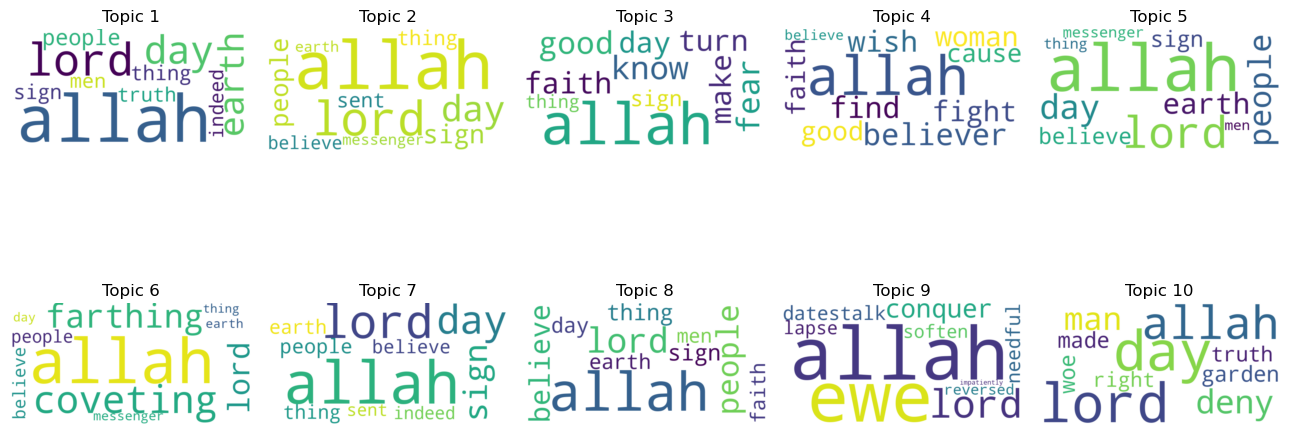

In [89]:
# creating wordcloud for words in each topic

# getting the top words for each topic
def get_top_words(best_model, num_words=10):
    top_words_per_topic = []
    for topic_id in range(best_model.num_topics):
        # Get the top words for the current topic
        top_words = best_model.show_topic(topic_id, topn=num_words)
        top_words_per_topic.append(top_words)
    return top_words_per_topic

# creating and saving word clouds for each topic
def create_wordclouds(best_model, num_words=10):
    top_words_per_topic = get_top_words(best_model, num_words)

    # 2x5 grid of subplots
    fig, axes = plt.subplots(2, 5, figsize=(13, 7))
    axes = axes.flatten()

    # creating wordclouds for each topic
    for topic_id, top_words in enumerate(top_words_per_topic):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

        # plotting wordclouds                         
        axes[topic_id].imshow(wordcloud, interpolation='bilinear')
        axes[topic_id].axis('off')
        axes[topic_id].set_title(f'Topic {topic_id + 1}')

    # adjusting layout
    plt.tight_layout()
    plt.show()

create_wordclouds(best_model, num_words=10)


In [47]:
# assigning topics to each juz'

def assign_topics_to_juz(best_model, text_data, juz_mapping):
    juz_topic_proportions = defaultdict(lambda: defaultdict(float))

    for juz, text in zip(juz_mapping.keys(), text_data):
        bow = dictionary.doc2bow(text)  # text to a bag-of-words representation
        topics = best_model.get_document_topics(bow)  # getting topics for the juz' section

        # accumulating topic proportions for entire division
        for topic, proportion in topics:
            juz_topic_proportions[juz][topic] += proportion

    # normalizing topic proportions
    for juz in juz_topic_proportions:
        total_proportion = sum(juz_topic_proportions[juz].values())
        for topic in juz_topic_proportions[juz]:
            juz_topic_proportions[juz][topic] /= total_proportion

    return juz_topic_proportions

# assigning topics to juz' sections with accumulated proportions
juz_topic_proportions = assign_topics_to_juz(best_model, cleaned_juz_text_data, juz_topic_mapping)


# result of mapping of juz' sections to their assigned topics with proportions

In [48]:
juz_topic_proportions

defaultdict(<function __main__.assign_topics_to_juz.<locals>.<lambda>()>,
            {'Juz 1': defaultdict(float, {7: 1.0}),
             'Juz 2': defaultdict(float, {2: 1.0}),
             'Juz 3': defaultdict(float,
                         {4: 0.30953613519248663, 7: 0.6904638648075133}),
             'Juz 4': defaultdict(float,
                         {2: 0.02032196794358081,
                          4: 0.31188985991200496,
                          7: 0.6677881721444142}),
             'Juz 5': defaultdict(float,
                         {3: 0.5007448850217231,
                          4: 0.1726722631021795,
                          7: 0.3265828518760974}),
             'Juz 6': defaultdict(float, {7: 1.0}),
             'Juz 7': defaultdict(float, {7: 1.0}),
             'Juz 8': defaultdict(float,
                         {4: 0.01074711001280675, 7: 0.9892528899871933}),
             'Juz 9': defaultdict(float,
                         {4: 0.3236732090197619, 7: 0.676326790

In [49]:
# assigning topic name to each topic based on the most frequent words

def assign_topic_names(lda_model, num_words=10):
    topic_names = {}

    for topic_id in range(lda_model.num_topics):
        # getting top words for the topic
        top_words = lda_model.show_topic(topic_id, topn=num_words)     
        # combining the top words into a string
        words_str = ', '.join(word for word, _ in top_words)        
        # assigning a name to the topic based on the top words
        topic_name = f'Topic {topic_id + 1}: {words_str}'
        topic_names[topic_id] = topic_name

    return topic_names

topic_names = assign_topic_names(best_model)
for topic_id, name in topic_names.items():
    print(name)


Topic 1: allah, lord, day, earth, people, thing, sign, men, truth, indeed
Topic 2: allah, lord, day, sign, people, thing, sent, believe, messenger, earth
Topic 3: allah, know, good, fear, turn, faith, make, day, sign, thing
Topic 4: allah, believer, find, wish, fight, woman, good, faith, cause, believe
Topic 5: allah, lord, day, people, earth, believe, sign, messenger, thing, men
Topic 6: allah, coveting, farthing, lord, people, believe, messenger, earth, day, thing
Topic 7: allah, lord, day, sign, people, earth, thing, believe, indeed, sent
Topic 8: allah, lord, people, believe, thing, sign, day, earth, faith, men
Topic 9: allah, ewe, lord, conquer, datestalk, needful, soften, lapse, reversed, impatiently
Topic 10: day, lord, allah, deny, man, garden, made, woe, truth, right


In [217]:
type(topic_names)

dict

In [218]:
topic_names[0]

'Topic 1: allah, lord, day, earth, people, thing, sign, men, truth, indeed'

In [50]:
cleaned_topics = {}

for key, value in topic_names.items():
    # splitting the string by :
    cleaned_topic = value.split(':')[1].strip()
    cleaned_topics[key] = cleaned_topic

cleaned_topics

{0: 'allah, lord, day, earth, people, thing, sign, men, truth, indeed',
 1: 'allah, lord, day, sign, people, thing, sent, believe, messenger, earth',
 2: 'allah, know, good, fear, turn, faith, make, day, sign, thing',
 3: 'allah, believer, find, wish, fight, woman, good, faith, cause, believe',
 4: 'allah, lord, day, people, earth, believe, sign, messenger, thing, men',
 5: 'allah, coveting, farthing, lord, people, believe, messenger, earth, day, thing',
 6: 'allah, lord, day, sign, people, earth, thing, believe, indeed, sent',
 7: 'allah, lord, people, believe, thing, sign, day, earth, faith, men',
 8: 'allah, ewe, lord, conquer, datestalk, needful, soften, lapse, reversed, impatiently',
 9: 'day, lord, allah, deny, man, garden, made, woe, truth, right'}

In [220]:
cleaned_topics[0]

'allah, lord, day, earth, people, thing, sign, men, truth, indeed'

# Sentiment Analysis on the document level (i.e. per Division (Juz'))

In [51]:
# Sentiment Analysis on each document related to the 30 divisions


# VADER lexicon
nltk.download('vader_lexicon')

# creating SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

data['sentiment_scores'] = data['cleaned_text'].apply(lambda x: [sia.polarity_scores(word) for word in x])
data['document_sentiment'] = data['sentiment_scores'].apply(lambda x: x[0]['compound'])
data[['cleaned_text', 'sentiment_scores', 'document_sentiment']]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,cleaned_text,sentiment_scores,document_sentiment
0,"[allah, gracious, merciful, praise, allah, che...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000
1,"[fool, among, people, turned, qibla, used, all...","[{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compoun...",-0.4404
2,"[messenger, endowed, gift, others, allah, spok...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000
3,"[food, lawful, child, israel, except, israel, ...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000
4,"[prohibited, woman, already, married, except, ...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000
5,"[allah, loveth, evil, noised, abroad, public, ...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000
6,"[strongest, among, men, enmity, believer, wilt...","[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compoun...",0.4404
7,"[even, send, angel, dead, gathered, together, ...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000
8,"[leader, arrogant, party, among, people, shuai...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000
9,"[know, booty, acquire, war, fifth, share, assi...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000


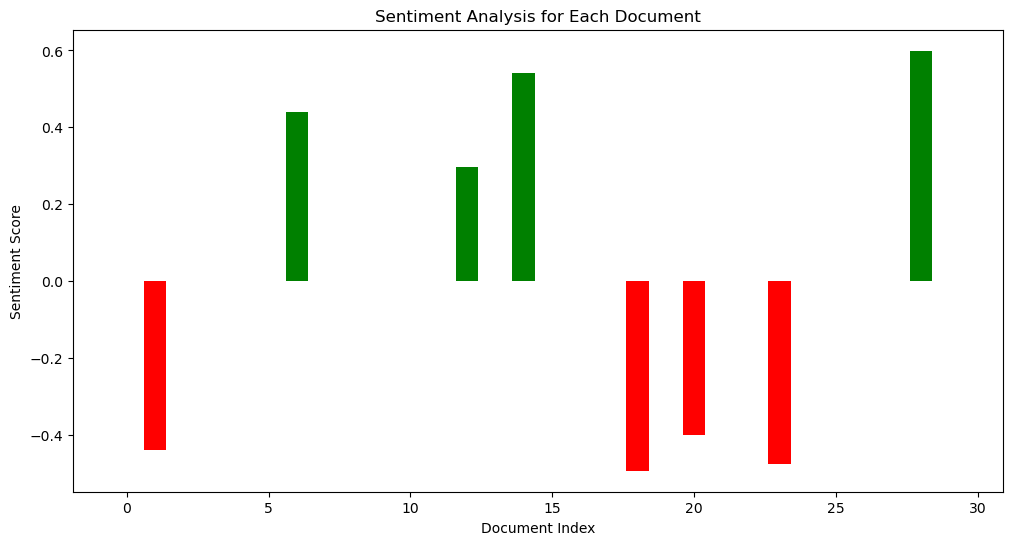

In [158]:
# plotting sentiments

sentiments = data['document_sentiment']
colors = np.where(sentiments >= 0, 'green', 'red')
plt.figure(figsize=(12, 6))
plt.bar(range(len(sentiments)), sentiments, color=colors)
plt.xlabel('Document Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis for Each Document')

plt.show()

In [52]:
# Classify sentiment as positive, negative, or neutral
 
division_sentiments = data.groupby('JuzNo')['document_sentiment'].mean()

# defining threshold for classifying sentiment
threshold = 0.0000

division_sentiments_classified = []

for sentiment in division_sentiments:
    if sentiment > threshold:
        division_sentiments_classified.append('Positive')
    elif sentiment < -threshold:
        division_sentiments_classified.append('Negative')
    else:
        division_sentiments_classified.append('Neutral')

# adding classified sentiment to the df
data['division_sentiment'] = data['JuzNo'].map(dict(zip(division_sentiments.index, division_sentiments_classified)))

division_sentiments_df = pd.DataFrame({'JuzNo': division_sentiments.index, 'Sentiment': division_sentiments_classified})
print(division_sentiments_df)


    JuzNo Sentiment
0       1   Neutral
1       2  Negative
2       3   Neutral
3       4   Neutral
4       5   Neutral
5       6   Neutral
6       7  Positive
7       8   Neutral
8       9   Neutral
9      10   Neutral
10     11   Neutral
11     12   Neutral
12     13  Positive
13     14   Neutral
14     15  Positive
15     16   Neutral
16     17   Neutral
17     18   Neutral
18     19  Negative
19     20   Neutral
20     21  Negative
21     22   Neutral
22     23   Neutral
23     24  Negative
24     25   Neutral
25     26   Neutral
26     27   Neutral
27     28   Neutral
28     29  Positive
29     30   Neutral


In [53]:
# Function to get unique topic names based on weights while preserving order

df_proportions = pd.DataFrame(list(juz_topic_proportions.items()), columns=['JuzNo', 'Weights'])

def get_unique_topic_names(weights):
    result_dict = OrderedDict()  # Use OrderedDict to preserve order
    for key, value in weights.items():
        topic_words = cleaned_topics[key].split(', ')
        if value == 1.0:
            result_dict.update({word: None for word in topic_words})
        else:
            num_words = int(len(topic_words) * value)
            result_dict.update({word: None for word in topic_words[:num_words]})
    return ', '.join(result_dict.keys())

# applying the function to create the new column
df_proportions['Juz_Topic_Names'] = df_proportions['Weights'].apply(get_unique_topic_names)

print(df_proportions[['JuzNo', 'Juz_Topic_Names']])


     JuzNo                                    Juz_Topic_Names
0    Juz 1  allah, lord, people, believe, thing, sign, day...
1    Juz 2  allah, know, good, fear, turn, faith, make, da...
2    Juz 3     allah, lord, day, people, believe, thing, sign
3    Juz 4     allah, lord, day, people, believe, thing, sign
4    Juz 5   allah, believer, find, wish, fight, lord, people
5    Juz 6  allah, lord, people, believe, thing, sign, day...
6    Juz 7  allah, lord, people, believe, thing, sign, day...
7    Juz 8  allah, lord, people, believe, thing, sign, day...
8    Juz 9     allah, lord, day, people, believe, thing, sign
9   Juz 10  allah, lord, day, people, earth, believe, sign...
10  Juz 11  allah, lord, day, people, earth, believe, sign...
11  Juz 12  allah, lord, day, people, earth, believe, sign...
12  Juz 13           allah, lord, day, people, believe, thing
13  Juz 14           allah, lord, day, people, earth, believe
14  Juz 15  allah, lord, day, people, earth, believe, sign...
15  Juz 

In [54]:
cleaned_topics

{0: 'allah, lord, day, earth, people, thing, sign, men, truth, indeed',
 1: 'allah, lord, day, sign, people, thing, sent, believe, messenger, earth',
 2: 'allah, know, good, fear, turn, faith, make, day, sign, thing',
 3: 'allah, believer, find, wish, fight, woman, good, faith, cause, believe',
 4: 'allah, lord, day, people, earth, believe, sign, messenger, thing, men',
 5: 'allah, coveting, farthing, lord, people, believe, messenger, earth, day, thing',
 6: 'allah, lord, day, sign, people, earth, thing, believe, indeed, sent',
 7: 'allah, lord, people, believe, thing, sign, day, earth, faith, men',
 8: 'allah, ewe, lord, conquer, datestalk, needful, soften, lapse, reversed, impatiently',
 9: 'day, lord, allah, deny, man, garden, made, woe, truth, right'}

## Wrapping dataframes and columns to display the final dataframe

In [55]:
data_keep_cols = ['JuzNo', 'EnglishTranslation', 'cleaned_text', 'sentiment_scores',
       'document_sentiment', 'division_sentiment']

data_final = data[data_keep_cols]

In [56]:
df_proportions_keep_cols = ['Weights', 'Juz_Topic_Names']
df_proportions_final = df_proportions[df_proportions_keep_cols]

In [57]:
final_df = pd.concat([data_final, df_proportions_final], axis=1)

# displaying final result
final_df

,JuzNo,EnglishTranslation,cleaned_text,sentiment_scores,document_sentiment,division_sentiment,Weights,Juz_Topic_Names
0,1,"In the name of Allah, Most Gracious, Most Merc...","[allah, gracious, merciful, praise, allah, che...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,Neutral,{7: 1.0},"allah, lord, people, believe, thing, sign, day..."
1,2,"The fools among the people will say: ""What hat...","[fool, among, people, turned, qibla, used, all...","[{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compoun...",-0.4404,Negative,{2: 1.0},"allah, know, good, fear, turn, faith, make, da..."
2,3,"Those messengers We endowed with gifts, some a...","[messenger, endowed, gift, others, allah, spok...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,Neutral,"{4: 0.30953613519248663, 7: 0.6904638648075133}","allah, lord, day, people, believe, thing, sign"
3,4,"All food was lawful to the Children of Israel,...","[food, lawful, child, israel, except, israel, ...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,Neutral,"{2: 0.02032196794358081, 4: 0.3118898599120049...","allah, lord, day, people, believe, thing, sign"
4,5,"Also (prohibited are) women already married, e...","[prohibited, woman, already, married, except, ...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,Neutral,"{3: 0.5007448850217231, 4: 0.1726722631021795,...","allah, believer, find, wish, fight, lord, people"
5,6,Allah loveth not that evil should be noised ab...,"[allah, loveth, evil, noised, abroad, public, ...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,Neutral,{7: 1.0},"allah, lord, people, believe, thing, sign, day..."
6,7,Strongest among men in enmity to the believers...,"[strongest, among, men, enmity, believer, wilt...","[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compoun...",0.4404,Positive,{7: 1.0},"allah, lord, people, believe, thing, sign, day..."
7,8,"Even if We did send unto them angels, and the ...","[even, send, angel, dead, gathered, together, ...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,Neutral,"{4: 0.01074711001280675, 7: 0.9892528899871933}","allah, lord, people, believe, thing, sign, day..."
8,9,"The leaders, the arrogant party among his peop...","[leader, arrogant, party, among, people, shuai...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,Neutral,"{4: 0.3236732090197619, 7: 0.6763267909802381}","allah, lord, day, people, believe, thing, sign"
9,10,And know that out of all the booty that ye may...,"[know, booty, acquire, war, fifth, share, assi...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,Neutral,"{2: 0.03394357215804677, 3: 0.0298486208769423...","allah, lord, day, people, earth, believe, sign..."
